## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from sklearn import preprocessing
from collections import Counter

Matplotlib is building the font cache; this may take a moment.


## Carregando base de dados

In [3]:
full_adult_df = pd.read_csv("data/adult.csv")

## Descrição do problema

Ao iniciar o processo de análise de dados, é essencial entendermos qual o problema que estamos tentando resolver, identificando as variáveis, tipos e, principalmente, quais são entradas, e quais são saídas.
No problema "adult", o objetivo é aprender se uma pessoa recebe um salário maior ou menor quue US$ 50.000 - ou seja, um problema de classificação em 2 classes. Para este problema, temos 15 variáveis (14 de entrada, uma de saída):
* age (idade)
* workclass (tipo de emprego)
* fnlwgt (peso que leva em consideração aspectos sociais)
* education (string descrevendo o nível de instrução)
* education-num (valor numérico - anos de educação)
* marital-status (estado civil)
* occupation (profissão)
* relationship (posição na família)
* race (raça)
* sex (sexo)
* capital-gain (renda em investimentos)
* capital-loss (prejuizo em investimentos)
* hours-per-week (horas trabalhadas por semana)
* native-country (país de nascimento)
* salary (saída - maior ou menor que 50 k)



In [4]:
print(full_adult_df.dtypes)

numeric_inputs = ["age", "capital-gain", "capital-loss", "hours-per-week"]
categoric_inputs = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
outputs = ["salary"]

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object


## Análise exploratória (variáveis numéricas)

<IPython.core.display.Javascript object>


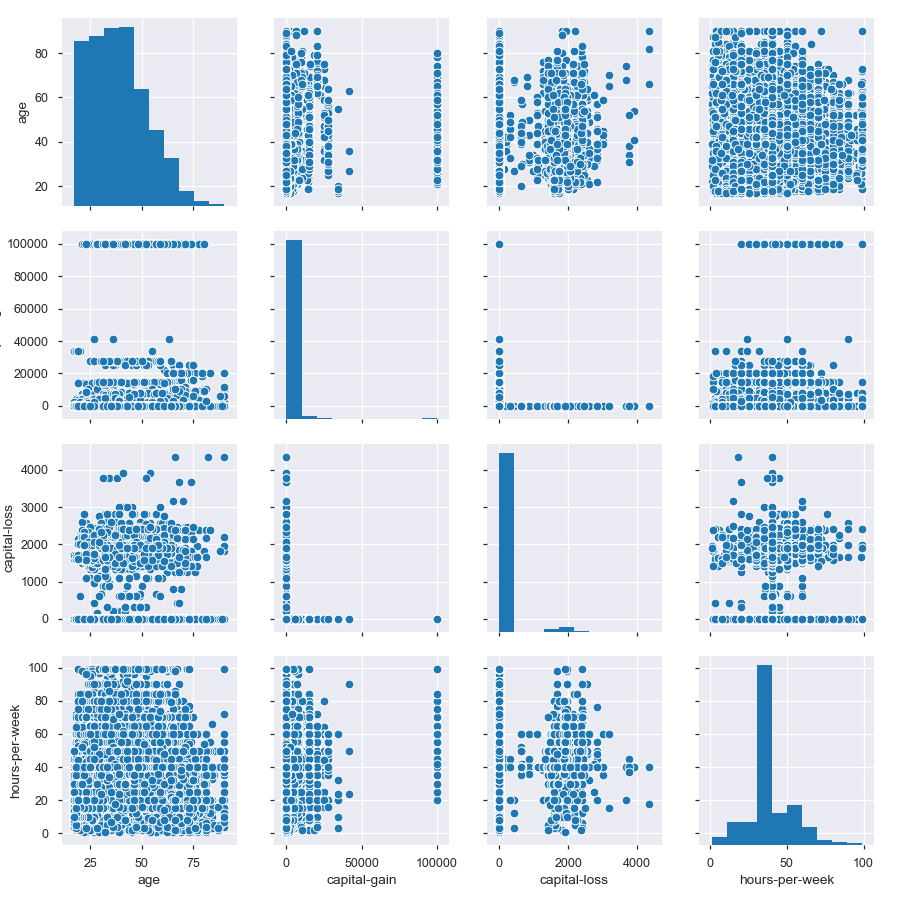

In [22]:
%matplotlib notebook
seaborn.pairplot(full_adult_df[numeric_inputs])

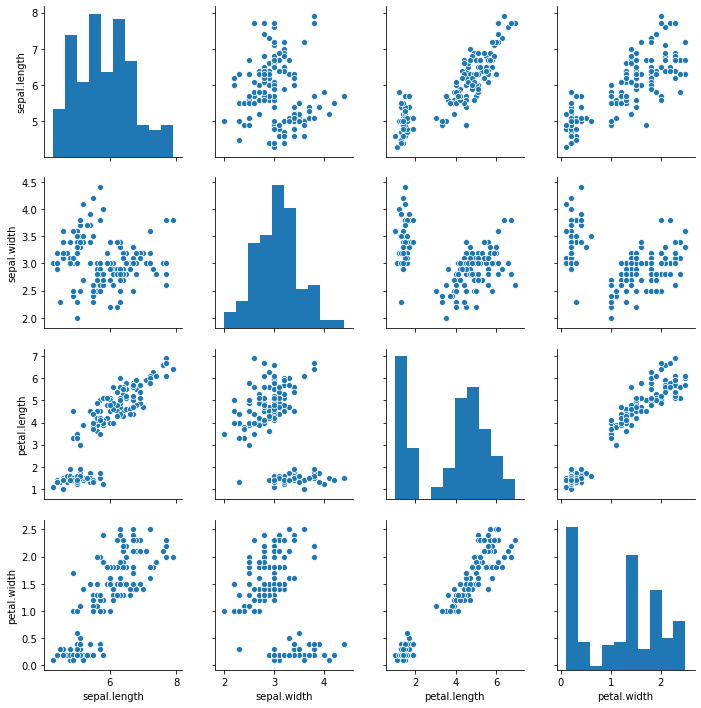

In [6]:
iris_df = pd.read_csv("data/iris.csv")

seaborn.pairplot(iris_df[iris_df.columns[0:4]])

## Pré processamento (variáveis numéricas)

In [7]:
normalizer = preprocessing.MinMaxScaler() 
normalized_df = normalizer.fit_transform(full_adult_df[numeric_inputs])
normalized_df = pd.DataFrame(normalized_df)
print(normalized_df.head())
normalized_df.columns = numeric_inputs
print(normalized_df.head())

          0        1    2         3
0  0.301370  0.02174  0.0  0.397959
1  0.452055  0.00000  0.0  0.122449
2  0.287671  0.00000  0.0  0.397959
3  0.493151  0.00000  0.0  0.397959
4  0.150685  0.00000  0.0  0.397959
        age  capital-gain  capital-loss  hours-per-week
0  0.301370       0.02174           0.0        0.397959
1  0.452055       0.00000           0.0        0.122449
2  0.287671       0.00000           0.0        0.397959
3  0.493151       0.00000           0.0        0.397959
4  0.150685       0.00000           0.0        0.397959


## Análise exploratória (variáveis categóricas)

[]

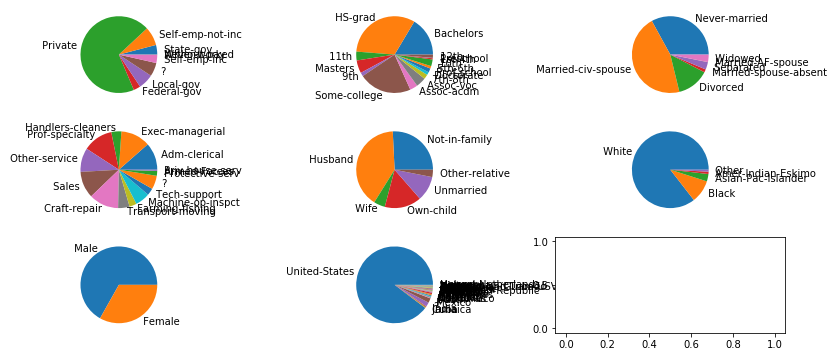

In [8]:
categoric_count = {}
for column in categoric_inputs:
    categoric_count[column] = Counter(full_adult_df[column])

fig, ax = plt.subplots(3, 3, figsize = (14, 6))

for i in range(0, len(categoric_inputs)):
    column = categoric_inputs[i]
    ax[int(i / 3)][i % 3].pie(categoric_count[column].values(), labels = categoric_count[column].keys())
    
plt.plot()


    





## Pré processamento (variáveis categóricas)

In [9]:
label_encoder = preprocessing.LabelEncoder()
one_hot_encoder = preprocessing.OneHotEncoder(sparse = False)

full_processed_df = normalized_df.copy()

for column in categoric_inputs:
    values = sorted(categoric_count[column].keys())
    col_names = []
    for value in values:
        col_names.append(column + value)
    label_encoded_df = label_encoder.fit_transform(full_adult_df[column])
    one_hot_df = label_encoded_df.reshape(len(label_encoded_df), 1)
    one_hot_df = one_hot_encoder.fit_transform(one_hot_df)
    one_hot_df = pd.DataFrame(one_hot_df)
    one_hot_df.columns = col_names
    full_processed_df = full_processed_df.join(one_hot_df)
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [10]:
label_encoder = preprocessing.LabelEncoder()

output_df = label_encoder.fit_transform(full_adult_df["salary"])

## Outra base de dados

In [11]:
from pandas_profiling import ProfileReport

df_credit = pd.read_csv("data/credit.csv")

ProfileReport(df_credit)




Number of variables,25
Number of observations,30000
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,200.0 B
Numeric,18
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,5


In [12]:
print(df_credit.columns)

boolean_columns = ['SEX']
categoric_columns = ["EDUCATION", "MARRIAGE"]
numeric_columns = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
output_columns = ["default.payment.next.month"]




Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [13]:
import numpy as np

normalizer = preprocessing.MinMaxScaler() 
corrected_df = normalizer.fit_transform(df_credit[numeric_columns])
corrected_df = pd.DataFrame(corrected_df)
corrected_df.columns = numeric_columns

corrected_df["SEX"] = df_credit["SEX"] - 1

categoric_count = {}
for column in categoric_columns:
    categoric_count[column] = Counter(df_credit[column])

one_hot_encoder = preprocessing.OneHotEncoder(sparse = False)

for column in categoric_columns:
    values = sorted(categoric_count[column].keys())
    col_names = []
    for value in values:
        col_names.append(column + str(value))
    one_hot_df = one_hot_encoder.fit_transform(np.array(df_credit[column]).reshape(-1, 1))
    one_hot_df = pd.DataFrame(one_hot_df)
    one_hot_df.columns = col_names
    corrected_df = corrected_df.join(one_hot_df)
    



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [14]:
credit_x_train, credit_x_test, credit_y_train, credit_y_test = train_test_split(
    corrected_df, df_credit["default.payment.next.month"], train_size = 0.80)


NameError: name 'train_test_split' is not defined

## Separação em treino e teste

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(full_processed_df, full_adult_df["salary"], train_size = 0.80)

In [16]:
iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(
    iris_df[iris_df.columns[0: 4]], iris_df[iris_df.columns[4]], train_size = 0.80)


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import scikitplot as skplt



## Classificação com KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(7)
knn_classifier.fit(x_train, y_train)
y_predict = knn_classifier.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, y_predict)

In [ ]:
precision_recall_fscore_support(y_test, y_predict)

In [ ]:
knn_classifier = KNeighborsClassifier(9)
knn_classifier.fit(credit_x_train, credit_y_train)
credit_y_predict = knn_classifier.predict(credit_x_test)
skplt.metrics.plot_confusion_matrix(credit_y_test, credit_y_predict)
accuracy_score(credit_y_test, credit_y_predict)

In [ ]:
precision_recall_fscore_support(credit_y_test, credit_y_predict)

## Classificação com árvore de decisão

0.8203500870099294

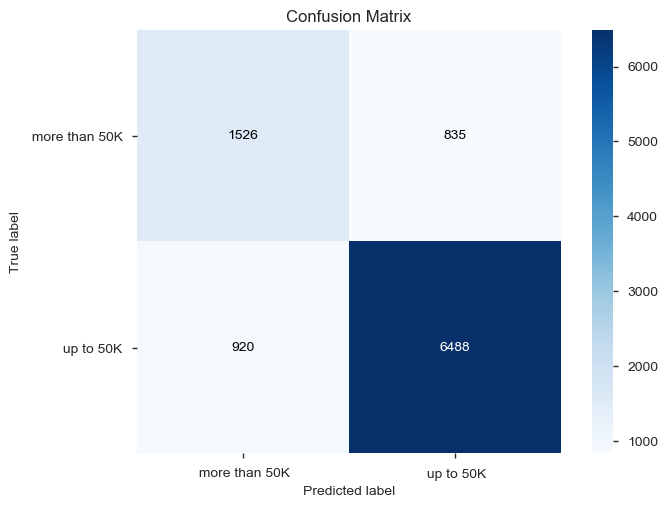

In [18]:
from sklearn.tree import DecisionTreeClassifier 
dt_classifier = DecisionTreeClassifier() 
dt_classifier.fit(x_train, y_train)
y_predict = dt_classifier.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, y_predict)
accuracy_score(y_test, y_predict)

In [19]:
precision_recall_fscore_support(y_test, y_predict)

(array([0.62387572, 0.88597569]),
 array([0.6463363 , 0.87580994]),
 array([0.63490743, 0.88086349]),
 array([2361, 7408], dtype=int64))

## Classificação com random forest

0.8492169106356843


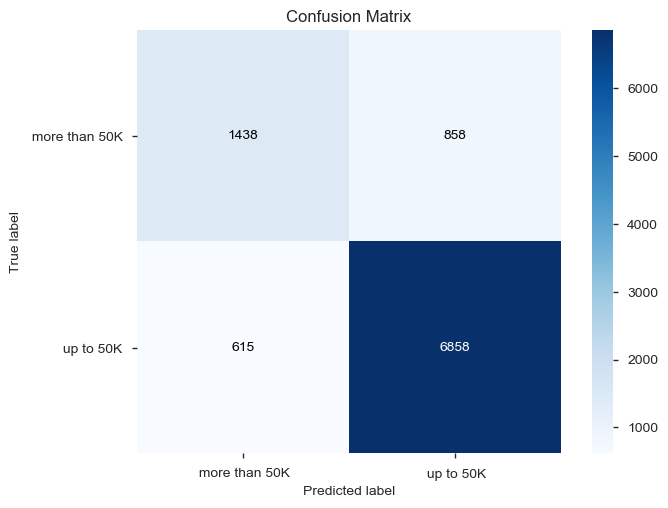

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(10) 
rf_classifier.fit(x_train, y_train)
y_predict = rf_classifier.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict))

In [91]:
precision_recall_fscore_support(y_test, y_predict)

(array([0.70043838, 0.88880249]),
 array([0.62630662, 0.91770373]),
 array([0.66130145, 0.90302192]),
 array([2296, 7473], dtype=int64))

## Classificação com SVM

In [107]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
y_predict = svm_classifier.predict(x_test)
print(accuracy_score(y_test, y_predict))

0.8367284266557478


## Visualizando árvores de decisão

<IPython.core.display.Javascript object>


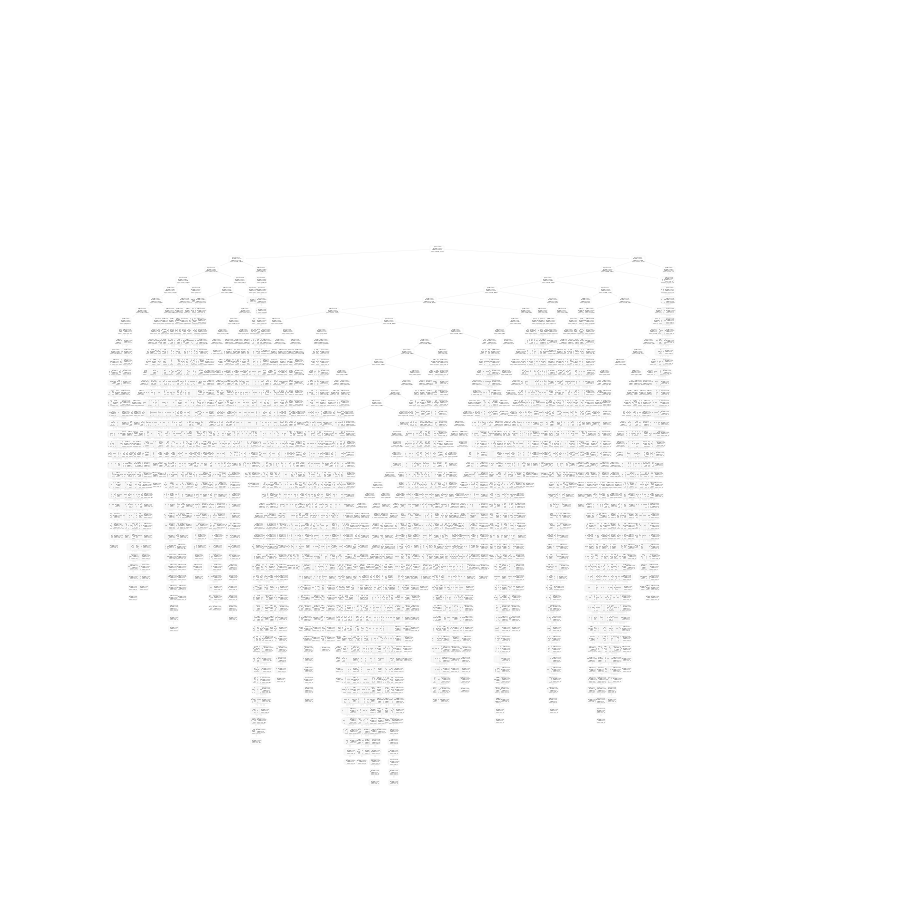

In [23]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(1, figsize = (10, 10))
plot_tree(dt_classifier, ax=ax)
plt.show()